In [23]:
%pylab inline
import urllib, json
import pandas as pd
import re
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [24]:
col_names=["displayName", "salary", "team", "position","opponent","ceiling","floor","points"]
data = pd.read_csv('week12.csv', names=col_names, header=None)

In [25]:
data.head()

,displayName,salary,team,position,opponent,ceiling,floor,points
0,Ryan Tannehill,5300,TEN,QB,JAC,26.32973,5.75218,15.89
1,Dak Prescott,6000,DAL,QB,NEP,28.71792,7.72632,17.64
2,Nick Foles,5400,JAC,QB,TEN,26.62387,5.44544,15.47
3,Ryan Finley,4700,CIN,QB,PIT,20.17050,4.04600,11.90
4,Sam Darnold,5800,NYJ,QB,OAK,26.98230,7.44983,16.97


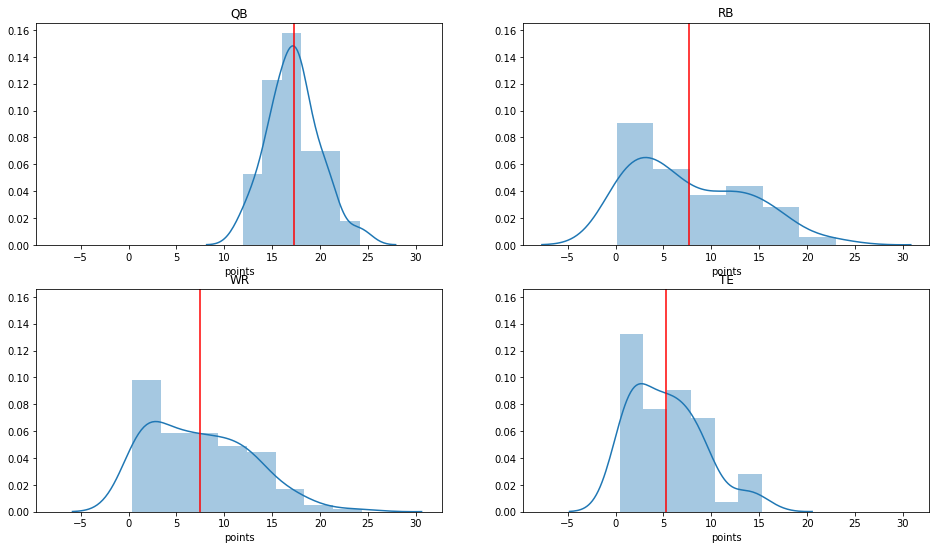

In [28]:
f = plt.figure(figsize(16,9))
ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2,sharex=ax1, sharey=ax1)
ax3 = f.add_subplot(2,2,3,sharex=ax1, sharey=ax1)
ax4 = f.add_subplot(2,2,4,sharex=ax1, sharey=ax1)

ax1.set_title('QB')
sns.distplot(data[data.position=='QB'].points, label='QB',ax=ax1)
ax1.axvline(np.mean(data[data.position=='QB'].points),color='red', label='mean')

ax2.set_title('RB')
sns.distplot(data[data.position=='RB'].points, label='RB',ax=ax2)
ax2.axvline(np.mean(data[data.position=='RB'].points),color='red', label='mean')

ax3.set_title('WR')
sns.distplot(data[data.position=='WR'].points, label='WR',ax=ax3)
ax3.axvline(np.mean(data[data.position=='WR'].points),color='red', label='mean')

ax4.set_title('TE')
sns.distplot(data[data.position=='TE'].points, label='TE',ax=ax4)
ax4.axvline(np.mean(data[data.position=='TE'].points),color='red', label='mean')

The above is looking at kernel density estimation by position for the data. It's necessary to split up the data by position given the variance in points scored by position as well as the differences in count by position (i.e. there are only 32 quarterbacks playing each week, 1 per team, but there could be 3-4 wide receivers per team). KDE works by calculating the distances of all the data points for each location on the blue line - as in, if more players are projected to score within a similar range of points, the estimate is higher indication the probability of a point in the location being high. For QB, it is fairly obvious that the spread is tighter for projected points, with the players all expected to get between 12-24 points, skewed towards the lower side. RB and WR show that there are more players projected to get fewer points, with only a few projected to get high scores.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Testing out the nflgame import from Python

In [4]:
import nflgame

nflgame requires Python 2.6+ and does not yet work with Python 3
You are running Python version 3.7


SystemExit: 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
